### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

In [1]:
#importing data
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

###  Data Exploration

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.shape

(2906, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [4]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [6]:
data['btc_n_orphaned_blocks'].value_counts()

0    2299
1     326
2     167
3      72
4      30
5      11
7       1
Name: btc_n_orphaned_blocks, dtype: int64

In [7]:
test['btc_n_orphaned_blocks'].value_counts()

0    14
Name: btc_n_orphaned_blocks, dtype: int64

In [8]:
#dropping the null values
data_without_na= data.dropna()
data_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2791 non-null object
btc_market_price                                       2791 non-null float64
btc_total_bitcoins                                     2791 non-null float64
btc_market_cap                                         2791 non-null float64
btc_trade_volume                                       2791 non-null float64
btc_blocks_size                                        2791 non-null float64
btc_avg_block_size                                     2791 non-null float64
btc_n_orphaned_blocks                                  2791 non-null int64
btc_n_transactions_per_block                           2791 non-null float64
btc_median_confirmation_time                           2791 non-null float64
btc_hash_rate                                          2791 non-null float64
btc_difficulty                                   

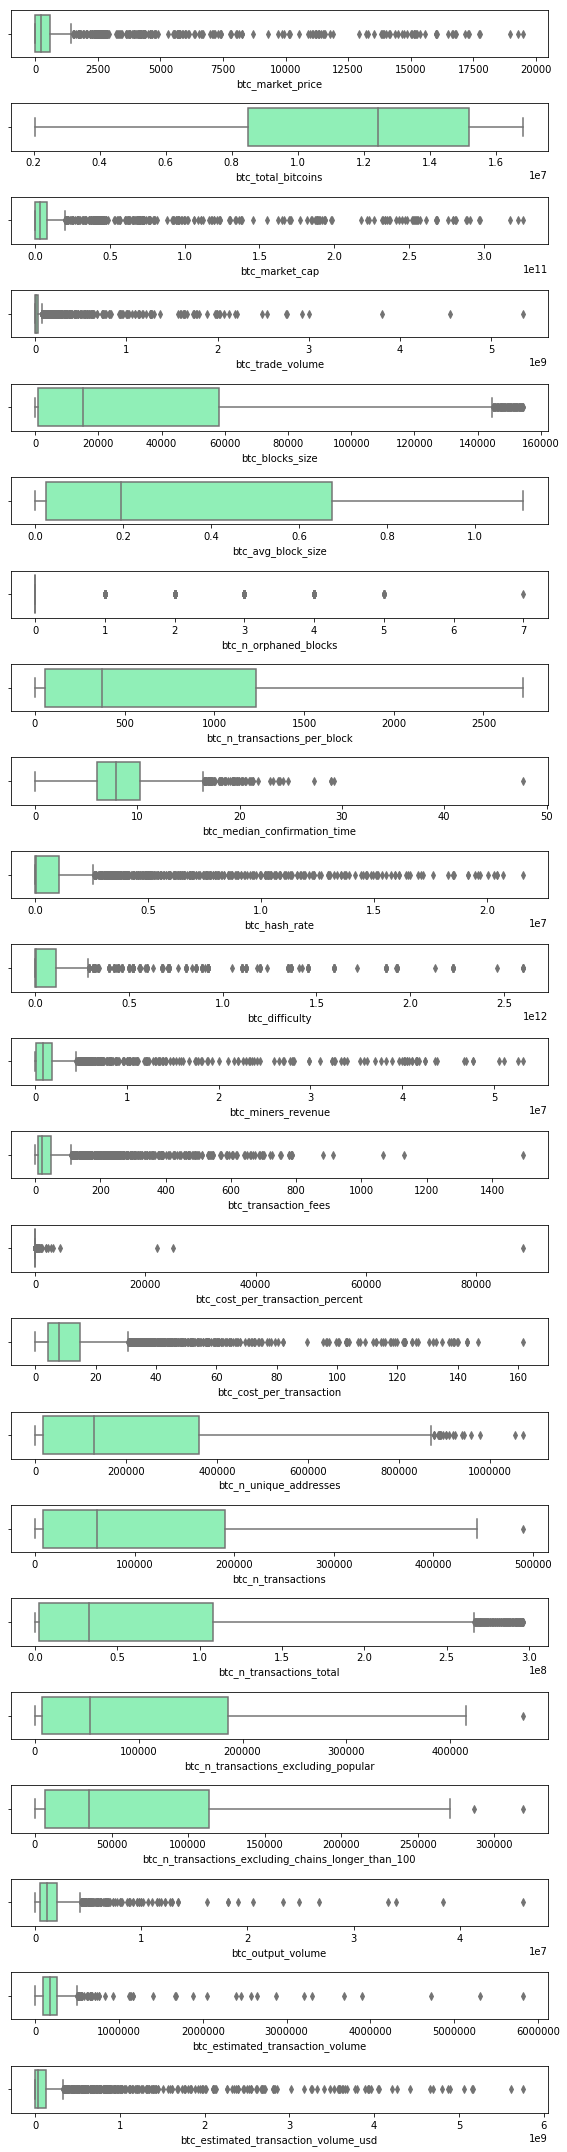

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig,axes=plt.subplots(23,1,figsize=(8,30),sharex=False)
i=0
for col in data.columns :
    if col!='Date' :
        sns.boxplot(data=data,palette='rainbow',orient='h',y=col,ax=axes[i])
        i=i+1
plt.tight_layout()

### From the above graph we can see that the range is different for different features and that the data is skewed, Hence this data requires scaling
### Which Scaler should be used?

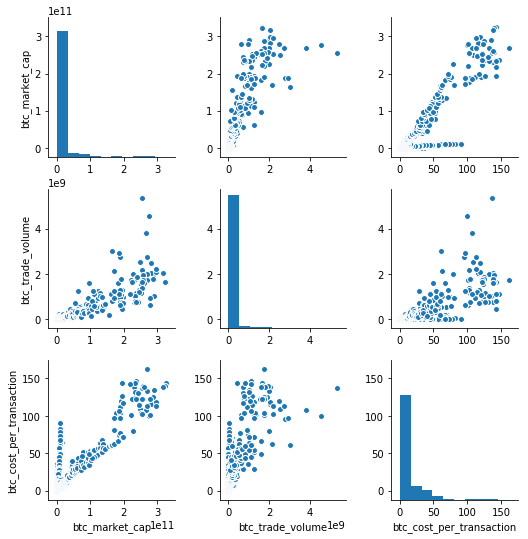

In [10]:
sns.pairplot(data=data_without_na[['btc_market_cap','btc_trade_volume','btc_cost_per_transaction']])

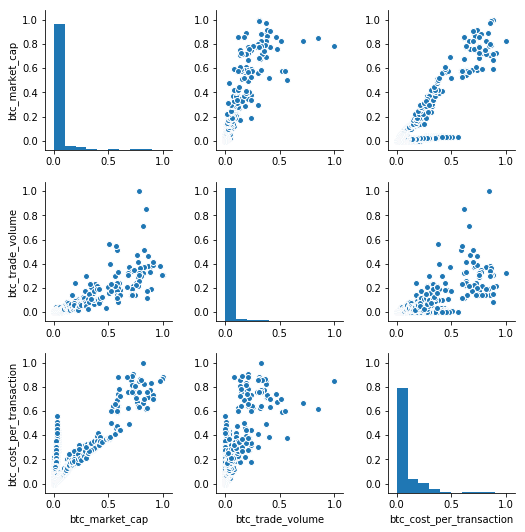

In [11]:
#Minmax
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X1=data_without_na[X]
X_scaled=scaler.fit_transform(X1)
X_scaled
data_scaled=pd.DataFrame(X_scaled,columns=X1.columns)
sns.pairplot(data=data_scaled[['btc_market_cap','btc_trade_volume','btc_cost_per_transaction']])

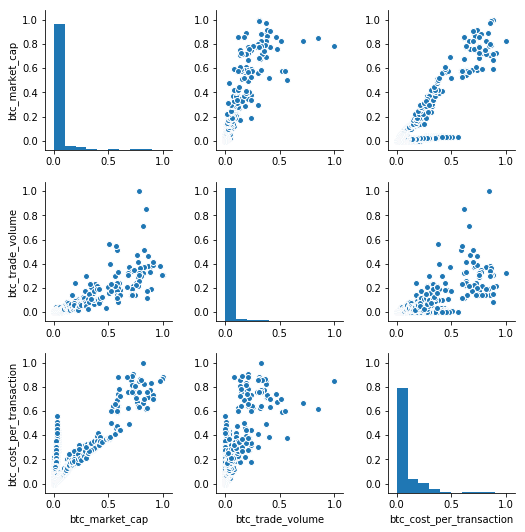

In [12]:
#Normalizer
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
X_scaled=scaler.fit_transform(X)
data_scaled2=pd.DataFrame(X_scaled,columns=X.columns)
sns.pairplot(data=data_scaled[['btc_market_cap','btc_trade_volume','btc_cost_per_transaction']])

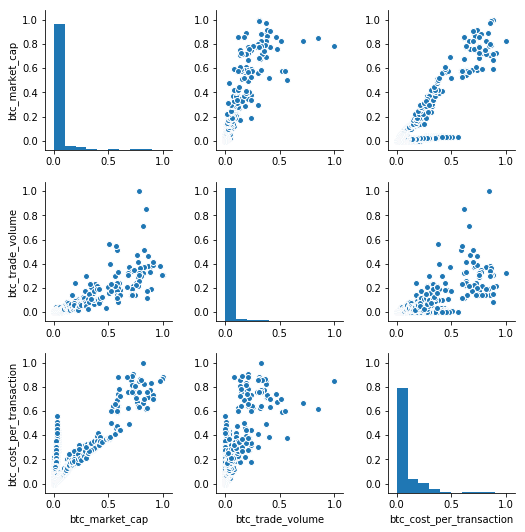

In [13]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
X_scaled=scaler.fit_transform(X)
data_scaled3=pd.DataFrame(X_scaled,columns=X.columns)
sns.pairplot(data=data_scaled[['btc_market_cap','btc_trade_volume','btc_cost_per_transaction']])

### Different scalers have been used, However from the above graphs we can see that minmax scaler maintains the structure of the data and brings all the features between 0 and 1, Hence not giving any importance to features with higher values

### KNN Regression

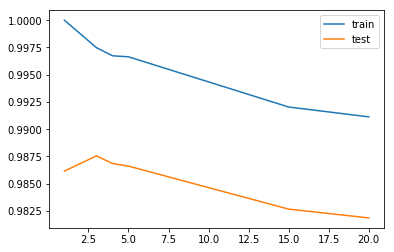

[0.98615418868097804, 0.98755058819995045, 0.98684781303036317, 0.98661026353531733, 0.98266351504554872, 0.981855956961453]


In [14]:
from sklearn.model_selection import train_test_split
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #scaling
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
param=[1,3,4,5,15,20]
scores_test=[]
scores_train=[]
#plotting accuracy and number of neighbors
for k in param :
    knnreg=KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train,y_train)
    scores_test.append(knnreg.score(X_test,y_test))
    scores_train.append(knnreg.score(X_train,y_train))
plt.plot(param,scores_train,label='train')
plt.plot(param,scores_test,label='test')
plt.legend()
plt.show()
print(scores_test)

### KNN regression with grid search to find the optimum number of neighbors

### Since grid search is supposed to be done on the whole of the training data, I imported the whole of the training data with out the nulls and created a pipeline to scale and fit the knn model within the grid search. The data can't be scaled before hand as the train and validation data must be separated before scaling to avoid data leakage. I used 10 fold cross validation, and the score was negative

Best Alpha Value :  {'knnreg__n_neighbors': 1}
Best Score :  -2.26226241295


Text(0.5,1,'Accuracy Graph')

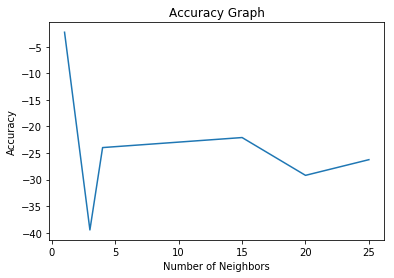

In [17]:
#Kfold Cross validation in grid search
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("knnreg",KNeighborsRegressor())]) #defining pipeline
cv=ShuffleSplit(X.shape[0],n_iter=50) #shuffle split cross validation
param_grid={'knnreg__n_neighbors':[1,3,4,15,20,25]}
grid_search=GridSearchCV(pipe,param_grid,cv=10,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['knnreg__n_neighbors'],results.mean_test_score)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

### However when I used shuffle split cross validation the score was high

Best Alpha Value :  {'knnreg__n_neighbors': 4}
Best Score :  0.994692650153


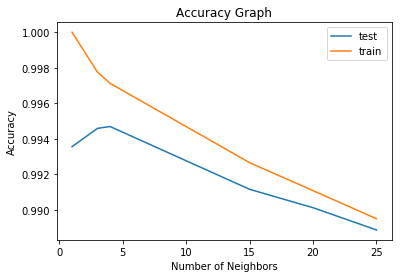

In [27]:
#Shuffle split cross validation in Grid Search for knn regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.neighbors import KNeighborsRegressor
cv=ShuffleSplit(X.shape[0],n_iter=50)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("knnreg",KNeighborsRegressor())]) #defining pipeline
cv=ShuffleSplit(X.shape[0],n_iter=30,random_state=10) #shuffle split cross validation
param_grid={'knnreg__n_neighbors':[1,3,4,15,20,25]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['knnreg__n_neighbors'],results.mean_test_score,label='test')
plt.plot(param_grid['knnreg__n_neighbors'],results.mean_train_score,label='train')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

### Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Train Score :",lm.score(X_train,y_train))
print("Test Score :",lm.score(X_test,y_test))
print("The coefficients are : ", lm.coef_)

Train Score : 0.999958625092
Test Score : 0.999956624767
The coefficients are :  [[ -6.30740019e+01   1.87794125e+04   4.30388845e+01  -3.21577020e+03
    1.94600572e+01  -3.05808121e+00  -3.38911819e+01   2.73651425e+01
   -4.80203722e+02   2.07260349e+02   3.31171524e+02  -1.95069369e+02
    3.77856278e+00   4.31520847e+02   1.33657722e+02   3.81189702e+01
    3.34690574e+03  -2.38257464e+01   2.15376795e+01   9.06383514e+00
    2.80209879e+00   9.90895635e+01]]


### Ridge Regression 
### Again I used pipeline to scale it with in the grid search and compared both kfold and shufflesplit cross validation

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("ridge",Ridge())]) #defining pipeline
param_grid={'ridge__alpha' : [0,1,3,8,15,25]}
grid_search=GridSearchCV(pipe,param_grid,cv=10,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)

Best Alpha Value :  {'ridge__alpha': 0}
Best Score :  -314332.263972


In [32]:
#With shuffle split cross validation
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import ShuffleSplit
cv=ShuffleSplit(X.shape[0],n_iter=50)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("ridge",Ridge())]) #defining pipeline
param_grid={'ridge__alpha' : [1,3,8,15,25]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)

Best Alpha Value :  {'ridge__alpha': 1}
Best Score :  0.996303873551


Best Alpha Value :  {'ridge__alpha': 0.5}
Best Score :  0.997952905605


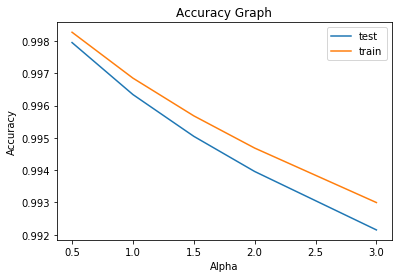

In [34]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import ShuffleSplit
cv=ShuffleSplit(X.shape[0],n_iter=50)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("ridge",Ridge())]) #defining pipeline
param_grid={'ridge__alpha' : [0.5,1,1.5,2,3]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['ridge__alpha'],results.mean_test_score,label='test')
plt.plot(param_grid['ridge__alpha'],results.mean_train_score,label='train')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

### As alpha becomes closer to 0 the model improves. Basically linear regression is the best model. 

### Lasso

 R2 score for Best alpha :  0.999910404082
The coefficients are  [  7.42149233e+00   1.86437432e+04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.10675675e+00   2.49724619e+00
   0.00000000e+00   0.00000000e+00   1.08491583e+02   0.00000000e+00
   0.00000000e+00   5.50426808e+02   8.78486700e+01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   1.44630630e+02]


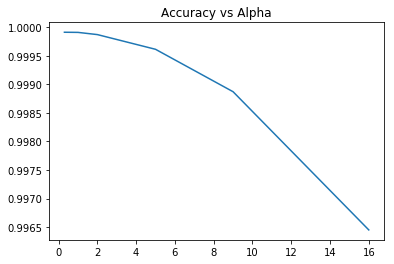

In [63]:
from sklearn.model_selection import train_test_split
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
alphas=[0.3,1,2,5,9,16]
scores=[]
for a in alphas :
    linlasso=Lasso(alpha=a)
    linlasso.fit(X_train,y_train)
    y_pred=linlasso.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
plt.plot(alphas,scores) 
plt.title("Accuracy vs Alpha")
linlasso=Lasso(alpha=0.3)
linlasso.fit(X_train,y_train)
y_pred=linlasso.predict(X_test)
print(" R2 score for Best alpha : ", r2_score(y_test,y_pred))
print("The coefficients are " , linlasso.coef_)


### Lasso with grid search

Best Alpha Value :  {'lasso__alpha': 1}
Best Score :  0.999885149752


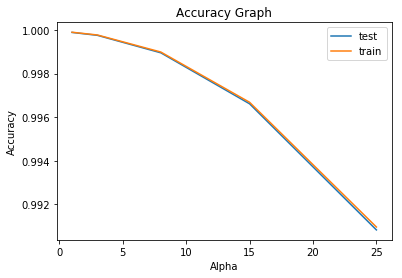

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.cross_validation import ShuffleSplit
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("lasso",Lasso())])
cv=ShuffleSplit(X.shape[0],n_iter=50)
param_grid={'lasso__alpha' : [1,3,8,15,25]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y)
print("Best Alpha Value : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['lasso__alpha'],results.mean_test_score,label='test')
plt.plot(param_grid['lasso__alpha'],results.mean_train_score,label='train')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

In [39]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004211,0.000806,0.999885,0.999894,1,{'lasso__alpha': 1},1,0.999840,0.999900,0.999911,...,0.999881,0.999895,0.999863,0.999893,0.999908,0.999892,0.005564,0.003049,0.000025,0.000004
1,0.002813,0.000938,0.999752,0.999768,3,{'lasso__alpha': 3},2,0.999734,0.999783,0.999755,...,0.999736,0.999770,0.999684,0.999768,0.999795,0.999760,0.006003,0.003712,0.000043,0.000009
2,0.002188,0.000938,0.998951,0.998987,8,{'lasso__alpha': 8},3,0.999080,0.999063,0.998826,...,0.998926,0.999010,0.998794,0.998981,0.999022,0.998952,0.005422,0.003711,0.000132,0.000051
3,0.003438,0.001563,0.996611,0.996681,15,{'lasso__alpha': 15},4,0.997151,0.996938,0.996161,...,0.996603,0.996758,0.996359,0.996662,0.996672,0.996571,0.006473,0.004688,0.000353,0.000172
4,0.004688,0.000000,0.990827,0.990960,25,{'lasso__alpha': 25},5,0.992356,0.991677,0.989632,...,0.990930,0.991186,0.990504,0.990898,0.990723,0.990628,0.007161,0.000000,0.000878,0.000478


### Polynomial Regression

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
poly=PolynomialFeatures(degree=2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Training Score : ",lm.score(X_train,y_train))
print("Test Score : ",lm.score(X_test,y_test))

Training Score :  0.999997557534
Test Score :  0.999882451113


### Polynomial Regression with Ridge
### Again I use a pipeline to scale within the grid search with shuffle split cross validation

 Best Parameter Value :  {'ridge__alpha': 1}
Best Score :  0.999511708704


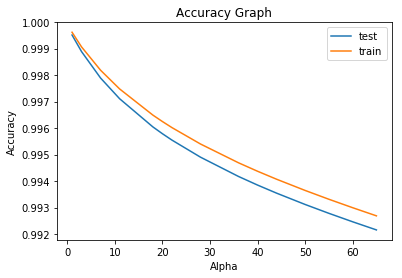

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
poly=PolynomialFeatures(degree=2)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
X_poly=poly.fit_transform(X)
pipe=Pipeline([("scaler",MinMaxScaler()),("ridge",Ridge())])
cv=ShuffleSplit(X.shape[0],n_iter=50,random_state=10)
param_grid= {'ridge__alpha' : [1,3,7,11,18,20,22,28,36,40,44,50,55,60,65]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv)
grid_search.fit(X_poly,y)
print(" Best Parameter Value : ", grid_search.best_params_)
print("Best Score : ",  grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['ridge__alpha'],results.mean_test_score,label='test')
plt.plot(param_grid['ridge__alpha'],results.mean_train_score,label='train')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

### Polynomial Regression with Lasso

 Best Parameter Value :  {'lasso__alpha': 1}
Best Score :  0.999902546858


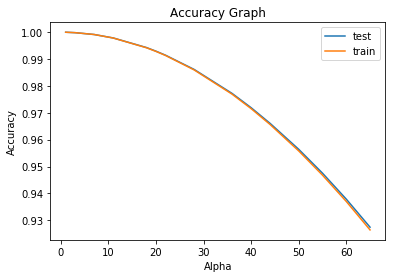

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
poly=PolynomialFeatures(degree=2)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
X_poly=poly.fit_transform(X)
pipe=Pipeline([("scaler",MinMaxScaler()),("lasso",Lasso())])
cv=ShuffleSplit(X.shape[0],n_iter=50,random_state=10)
param_grid= {'lasso__alpha' : [1,3,7,11,18,20,22,28,36,40,44,50,55,60,65]}
grid_search=GridSearchCV(pipe,param_grid,cv=cv)
grid_search.fit(X_poly,y)
print(" Best Parameter Value : ", grid_search.best_params_)
print("Best Score : ",  grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['lasso__alpha'],results.mean_test_score,label='test')
plt.plot(param_grid['lasso__alpha'],results.mean_train_score,label='train')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

### SVM
### Ran grid search on linear kernel with C and epsilon as parameters

Best Parameter :  {'SVR__C': 10, 'SVR__epsilon': 1}
Best Score :  0.532516889733


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

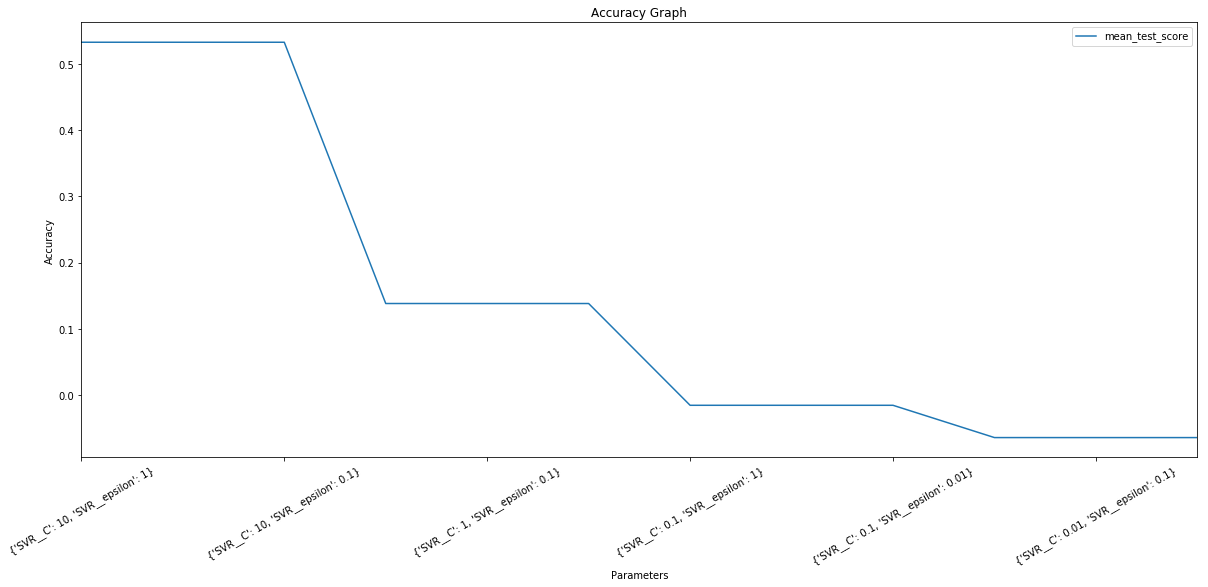

In [44]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
cv=ShuffleSplit(X.shape[0],n_iter=20,random_state=10)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("SVR",SVR(kernel='linear'))]) #pipeline
param_grid = {'SVR__C':[0.01,0.1,1,10],'SVR__epsilon' : [0.01,0.1,1]} #parameter grid
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y.values.ravel())
print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
results=results.sort_values(by='mean_test_score',ascending=False)
fig,axes=plt.subplots(figsize=(20,8))
results.plot(x='params',y='mean_test_score',ax=axes)
plt.title("Accuracy Graph")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)

### Ran grid search on poly kernel with C and gamma as parameters

Best Parameter :  {'SVR__C': 10, 'SVR__gamma': 1}
Best Score :  0.998175336714


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

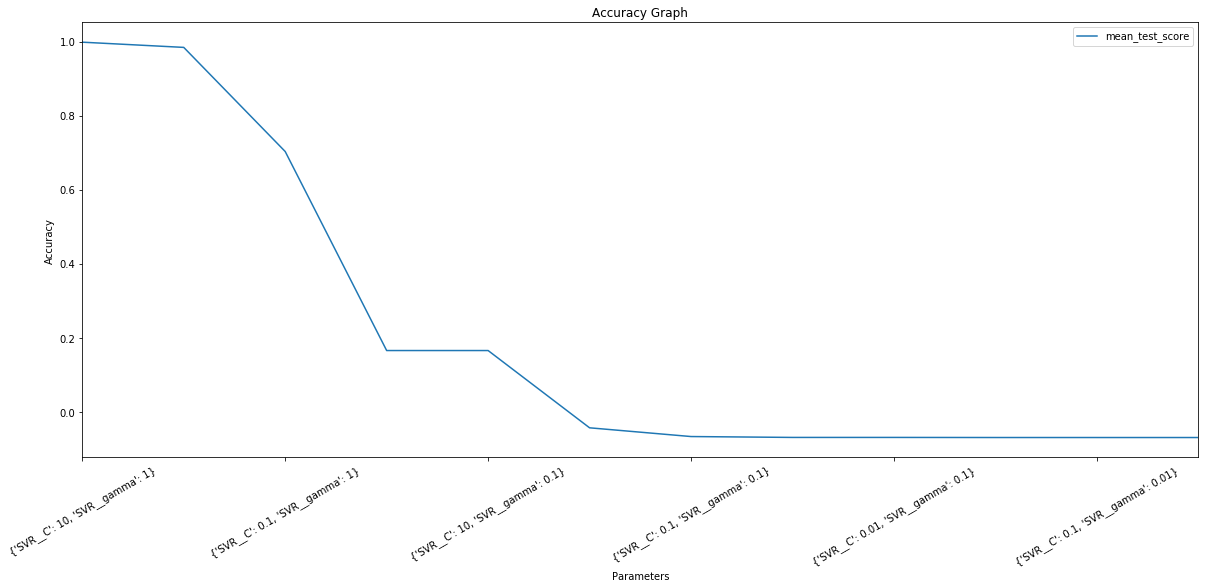

In [45]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
cv=ShuffleSplit(X.shape[0],n_iter=20,random_state=10)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("SVR",SVR(kernel='poly'))]) #pipeline
param_grid = {'SVR__C':[0.01,0.1,1,10],'SVR__gamma' : [0.01,0.1,1]} #parameter grid
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y.values.ravel())
print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
results=results.sort_values(by='mean_test_score',ascending=False)
fig,axes=plt.subplots(figsize=(20,8))
results.plot(x='params',y='mean_test_score',ax=axes)
plt.title("Accuracy Graph")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)

### Grid Search with rbf kernel, C, gamma parameters

Best Parameter :  {'SVR__C': 10, 'SVR__gamma': 1}
Best Score :  0.220049034001


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.]),
 <a list of 7 Text xticklabel objects>)

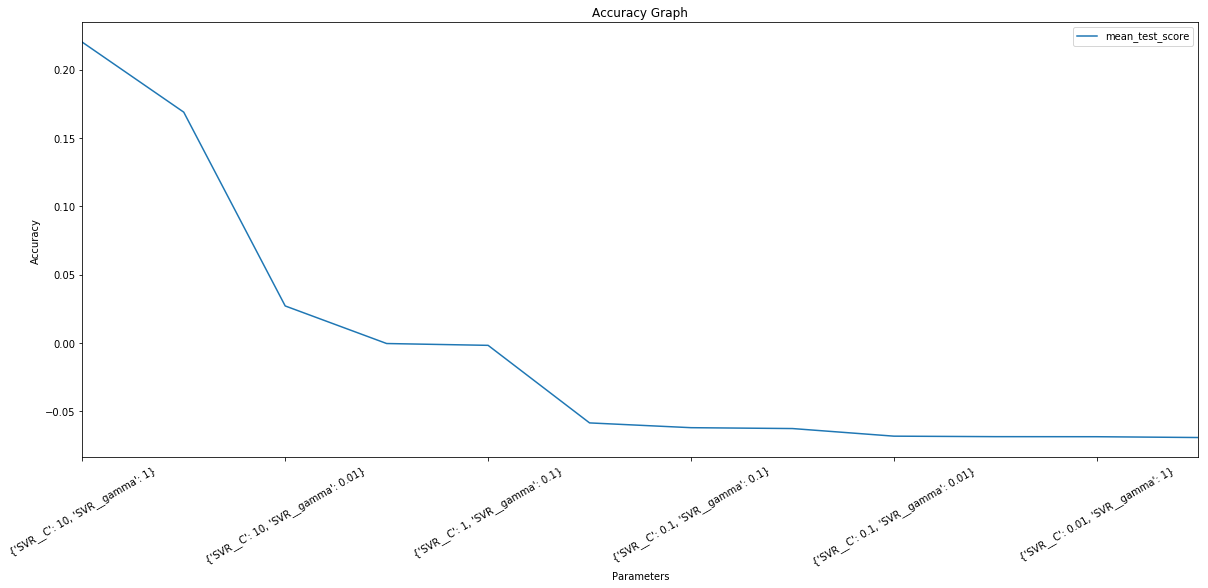

In [46]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
cv=ShuffleSplit(X.shape[0],n_iter=20,random_state=10)
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X=data_without_na[X]
y=data_without_na[['btc_market_price']]
pipe=Pipeline([("scaler",MinMaxScaler()),("SVR",SVR(kernel='rbf'))]) #pipeline
param_grid = {'SVR__C':[0.01,0.1,1,10],'SVR__gamma' : [0.01,0.1,1]} #parameter grid
grid_search=GridSearchCV(pipe,param_grid,cv=cv,scoring='r2')
grid_search.fit(X,y.values.ravel())
print("Best Parameter : ",grid_search.best_params_)
print("Best Score : ",grid_search.best_score_)
results=pd.DataFrame(grid_search.cv_results_)
results=results.sort_values(by='mean_test_score',ascending=False)
fig,axes=plt.subplots(figsize=(20,8))
results.plot(x='params',y='mean_test_score',ax=axes)
plt.title("Accuracy Graph")
plt.xlabel("Parameters")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)

### The best model is linear model as it has the highest test score with 0.9999 hence I will use the same for training and testtng the whole data. The mean score that has been obtained in these models are actually the cross validated score which is done by grid search.

In [48]:
#training the linear regression model on the entire data set
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=[col for col in data.columns.values if col!= 'Date' if col!='btc_market_price']
X1=data_without_na[X]
X_scaled=scaler.fit_transform(X1)
y=data_without_na[['btc_market_price']]
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_scaled,y)
X2=[col for col in test.columns.values if col!= 'Date']
test_without_date=test[X2]
test_scaled=scaler.transform(test_without_date)
test['btc_market_price']=lm.predict(test_scaled)

In [50]:
test

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,btc_market_price
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.32070,2.515366e+09,9055.259423
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.21920,2.944217e+09,8886.563817
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.02440,1.491970e+09,9071.208047
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.21400,1.623377e+09,8402.392216
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.29930,1.758323e+09,6765.556851
5,2/6/2018 0:00,16850425.0,1.295060e+11,3.094258e+09,155504.2500,1.067524,0,1436.000000,7.433333,24293141.32,...,72.073119,589896,244120,298011427,238351,164738,1.914333e+06,286153.34030,2.199270e+09,7593.445999
6,2/7/2018 0:00,16852187.5,1.365020e+11,1.670288e+09,155655.3629,1.071722,0,1515.737589,8.866667,20149017.21,...,71.480272,489402,213719,298225146,205988,144287,1.160112e+06,208207.33170,1.686471e+09,8069.377019
7,2/8/2018 0:00,16853825.0,1.388850e+11,1.336662e+09,155792.6909,1.048305,0,1322.816794,13.675000,18720008.90,...,82.053232,398607,173289,298398435,166517,126556,1.171510e+06,214089.82690,1.764215e+09,8256.778645
8,2/9/2018 0:00,16855512.5,1.438710e+11,1.093135e+09,155937.9769,1.076193,0,1317.481481,12.200000,19291612.22,...,85.223878,462086,177860,298576295,173698,131499,1.144163e+06,199472.83090,1.702604e+09,8550.416315
9,2/10/2018 0:00,16857300.0,1.402510e+11,9.185402e+08,156085.9522,1.034792,0,1271.209790,9.450000,20434818.87,...,85.874632,421547,181783,298758078,177603,133091,1.537986e+06,116211.04860,9.668616e+08,8297.176611
